# EXP 2


## Dataset Identification, Curation, and Preprocessing for Fine-tuning


In [ ]:
from datasets import load_dataset

# Load the intronhealth/afrimedqa_v2 dataset
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')

print("intronhealth/afrimedqa_v2 dataset loaded successfully:")
print(afrimedqa_dataset)

# Display a sample of its content (first example from the 'train' split)
print("\nSample from intronhealth/afrimedqa_v2 (train split, first example):")
if 'train' in afrimedqa_dataset and len(afrimedqa_dataset['train']) > 0:
    print(afrimedqa_dataset['train'][0])
else:
    print("Train split is empty or not available.")

README.md:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

afri_med_qa_15k_v2.4_phase_2_15275.csv:   0%|          | 0.00/8.64M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15275 [00:00<?, ? examples/s]

intronhealth/afrimedqa_v2 dataset loaded successfully:
DatasetDict({
    train: Dataset({
        features: ['sample_id', 'split', 'gender', 'discipline', 'clinical_experience', 'country', 'question_type', 'prompt', 'question', 'question_clean', 'answer_options', 'correct_answer', 'answer_rationale', 'specialty', 'region_specific', 'mentions_Africa', 'mentions_age', 'mentions_gender', 'tier', 'neg_percent', 'quality', 'rated_african', 'rated_correct', 'rated_omission', 'rated_hallucination', 'rated_reasonable', 'rated_harmful', 'rated_bias', 'version'],
        num_rows: 15275
    })
})

Sample from intronhealth/afrimedqa_v2 (train split, first example):
{'sample_id': 'ff784abc6b461a6a15d7f8bf5e6560d3393474fe4748699ff4c7f2124292b95f', 'split': 'train', 'gender': 'Male', 'discipline': 'Non-Health', 'clinical_experience': 'Intern', 'country': 'NG', 'question_type': 'consumer_queries', 'prompt': 'Your female friend complains of weight gain, high blood pressure and thinks she has Lupus Nep

In [ ]:
import kagglehub
import os

# Download the MedQuAD dataset files
medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")

print(f"MedQuAD dataset downloaded successfully to: {medquad_download_path}")

# List the contents of the downloaded directory
print("\nContents of the MedQuAD dataset directory:")
for item in os.listdir(medquad_download_path):
    print(item)


100%|██████████| 4.95M/4.95M [00:00<00:00, 59.8MB/s]

Extracting files...


MedQuAD dataset downloaded successfully to: /root/.cache/kagglehub/datasets/pythonafroz/medquad-medical-question-answer-for-ai-research/versions/1

Contents of the MedQuAD dataset directory:
medquad.csv


In [ ]:
import pandas as pd
import os

# Construct the full path to the medquad.csv file
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')

# Load the MedQuAD dataset from the CSV file into a pandas DataFrame
medquad_df = pd.read_csv(medquad_csv_path)

print("MedQuAD dataset (DataFrame) loaded successfully:")
print(medquad_df.head())
print(f"\nShape of MedQuAD DataFrame: {medquad_df.shape}")

MedQuAD dataset (DataFrame) loaded successfully:
                                 question  \
0                What is (are) Glaucoma ?   
1                  What causes Glaucoma ?   
2     What are the symptoms of Glaucoma ?   
3  What are the treatments for Glaucoma ?   
4                What is (are) Glaucoma ?   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   

  focus_area  
0   Glaucoma  
1   Glaucoma  
2   Glaucoma  
3   Glaucoma  
4   Glaucoma  

Shape of MedQuAD DataFrame: (16412, 4)


In [ ]:
from datasets import Dataset

# Create a new DataFrame with 'instruction' and 'response' columns from medquad_df
# Ensure both question and answer are strings
medquad_qa_df = medquad_df.copy()
medquad_qa_df['instruction'] = medquad_qa_df['question'].astype(str)
medquad_qa_df['response'] = medquad_qa_df['answer'].astype(str)

# Select only the relevant columns and convert to a Hugging Face Dataset
medquad_qa_dataset = Dataset.from_pandas(medquad_qa_df[['instruction', 'response']])

print("MedQuAD dataset converted to unified QA format successfully:")
print(medquad_qa_dataset)
print("\nSample from MedQuAD QA dataset (first example):")
print(medquad_qa_dataset[0])

MedQuAD dataset converted to unified QA format successfully:
Dataset({
    features: ['instruction', 'response'],
    num_rows: 16412
})

Sample from MedQuAD QA dataset (first example):
{'instruction': 'What is (are) Glaucoma ?', 'response': "Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As 

In [ ]:
from datasets import Dataset
import pandas as pd

# Convert the afrimedqa_dataset to a pandas DataFrame first for easier manipulation
afrimedqa_df = afrimedqa_dataset['train'].to_pandas()

# Create 'instruction' and 'response' columns for afrimedqa_df
# Use 'question' as instruction and 'answer_rationale' as response.
# Handle potential None values by converting to empty string if None.
afrimedqa_df['instruction'] = afrimedqa_df['question'].astype(str)
afrimedqa_df['response'] = afrimedqa_df['answer_rationale'].fillna('').astype(str)

# Select only the relevant columns and convert to a Hugging Face Dataset
afrimedqa_qa_dataset = Dataset.from_pandas(afrimedqa_df[['instruction', 'response']])

print("intronhealth/afrimedqa_v2 dataset converted to unified QA format successfully:")
print(afrimedqa_qa_dataset)
print("\nSample from intronhealth/afrimedqa_v2 QA dataset (first example):")
print(afrimedqa_qa_dataset[0])

intronhealth/afrimedqa_v2 dataset converted to unified QA format successfully:
Dataset({
    features: ['instruction', 'response'],
    num_rows: 15275
})

Sample from intronhealth/afrimedqa_v2 QA dataset (first example):
{'instruction': 'Can you provide recommendations for managing stress and improving mental well-being in relation to my condition?', 'response': ''}


In [ ]:
from datasets import concatenate_datasets

# Concatenate the two unified datasets
unified_dataset = concatenate_datasets([medquad_qa_dataset, afrimedqa_qa_dataset])

print("Unified dataset created successfully:")
print(unified_dataset)
print("\nSample from unified dataset (first example):")
print(unified_dataset[0])
print("\nSample from unified dataset (last example - from afrimedqa):")
print(unified_dataset[len(unified_dataset) - 1])

Unified dataset created successfully:
Dataset({
    features: ['instruction', 'response'],
    num_rows: 31687
})

Sample from unified dataset (first example):
{'instruction': 'What is (are) Glaucoma ?', 'response': "Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As the fluid builds up, the p

In [ ]:
from datasets import DatasetDict

# Initial cleaning: Remove entries where 'instruction' or 'response' is empty or consists only of whitespace
# This ensures data quality before splitting.
initial_num_rows = len(unified_dataset)
unified_dataset = unified_dataset.filter(lambda example: example['instruction'].strip() != '' and example['response'].strip() != '')
cleaned_num_rows = len(unified_dataset)

print(f"Removed {initial_num_rows - cleaned_num_rows} entries due to empty instruction or response.")
print(f"Unified dataset after cleaning: {unified_dataset}")

# Split the unified dataset into training, validation, and test sets
# Using a common split ratio like 80% train, 10% validation, 10% test.
# First, shuffle the dataset to ensure a good mix of data from both sources.
shuffled_dataset = unified_dataset.shuffle(seed=42)

# Split into 80% train, 20% (validation + test)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)

# Further split the 20% into 10% validation and 10% test
# We'll split the 'test_size' (0.2) in half for validation and test, so 0.5 of the 0.2
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)

# Create the final DatasetDict
train_val_test_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'], # 'train' of val_test_split becomes validation
    'test': val_test_split['test']        # 'test' of val_test_split remains test
})

print("\nUnified dataset split into training, validation, and test sets successfully:")
print(train_val_test_dataset)

# Display sample from each split
print("\nSample from training set (first example):")
print(train_val_test_dataset['train'][0])
print("\nSample from validation set (first example):")
print(train_val_test_dataset['validation'][0])
print("\nSample from test set (first example):")
print(train_val_test_dataset['test'][0])


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Removed 13565 entries due to empty instruction or response.
Unified dataset after cleaning: Dataset({
    features: ['instruction', 'response'],
    num_rows: 18122
})

Unified dataset split into training, validation, and test sets successfully:
DatasetDict({
    train: Dataset({
        features: ['instruction', 'response'],
        num_rows: 14497
    })
    validation: Dataset({
        features: ['instruction', 'response'],
        num_rows: 1812
    })
    test: Dataset({
        features: ['instruction', 'response'],
        num_rows: 1813
    })
})

Sample from training set (first example):
{'instruction': 'What are the symptoms of Porokeratosis of Mibelli ?', 'response': 'What are the signs and symptoms of Porokeratosis of Mibelli? The Human Phenotype Ontology provides the following list of signs and symptoms for Porokeratosis of Mibelli. If the information is available, the table below includes how often the symptom is seen in people with this condition. You can use the Medlin

In [ ]:
from transformers import AutoTokenizer

# Define the base model for which the tokenizer will be used
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Add a padding token if it doesn't exist (common for some models like TinyLlama)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # Or tokenizer.eos_token

# Define a function to format the dataset into instruction-response pairs suitable for chat models
def format_prompt(example):
    # Ensure both 'instruction' and 'response' are strings
    instruction = str(example['instruction'])
    response = str(example['response'])

    # Use a simple instruction-following format. For more complex models,
    # consider chat templates like `tokenizer.apply_chat_template`.
    # Example template: "### Instruction:\n{instruction}\n\n### Response:\n{response}"
    # For TinyLlama-1.1B-Chat-v1.0, a simple QA format or chat format might be suitable.
    # Let's use a format similar to Alpaca or LLaMA instruction tuning.
    formatted_text = f"""### Instruction:
{instruction}

### Response:
{response}"""
    return {'text': formatted_text}

# Apply the formatting function to all splits of the dataset
formatted_dataset = train_val_test_dataset.map(format_prompt, remove_columns=['instruction', 'response'])

# Tokenization function
def tokenize_function(examples):
    # Tokenize the 'text' column generated by the format_prompt function
    # Truncation and padding are important for context window management
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

# Apply tokenization to all splits of the formatted dataset
tokenized_dataset = formatted_dataset.map(tokenize_function, batched=True)

print("Tokenizer loaded and applied to the dataset successfully.")
print(f"Tokenizer pad_token: {tokenizer.pad_token}")
print(f"Tokenizer pad_token_id: {tokenizer.pad_token_id}")
print("\nSample of tokenized training data (first example keys):\n")
print(tokenized_dataset['train'][0].keys())
print("\nSample of tokenized training data (first example 'input_ids' length):\n")
print(len(tokenized_dataset['train'][0]['input_ids']))
print("\nSample of tokenized training data (first example 'attention_mask' length):\n")
print(len(tokenized_dataset['train'][0]['attention_mask']))

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Tokenizer loaded and applied to the dataset successfully.
Tokenizer pad_token: </s>
Tokenizer pad_token_id: 2

Sample of tokenized training data (first example keys):

dict_keys(['text', 'input_ids', 'attention_mask'])

Sample of tokenized training data (first example 'input_ids' length):

512

Sample of tokenized training data (first example 'attention_mask' length):

512


## Fine-tuning Strategy Design (LoRA & PEFT)


In [ ]:
import torch
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer, DataCollatorForLanguageModeling, BitsAndBytesConfig
from peft import LoraConfig, get_peft_model, TaskType

# 1. Load the base model and move it to a GPU if available
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define quantization config for 4-bit loading
# Only if CUDA is available, otherwise 4-bit loading is not supported
quantization_config = None
if torch.cuda.is_available():
    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
        bnb_4bit_use_double_quant=False,
    )

# Load the model with appropriate dtype and quantization config
model = AutoModelForCausalLM.from_pretrained(
    base_model_name,
    quantization_config=quantization_config, # Pass the quantization config here
    dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float32, # Use dtype instead of torch_dtype
    device_map="auto"
)

# 2. Configure LoRA parameters
# Define target modules based on TinyLlama's architecture (common ones for Llama-like models)
target_modules = ["q_proj", "v_proj", "k_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]

lora_config = LoraConfig(
    r=8,  # LoRA attention dimension
    lora_alpha=16, # Alpha parameter for LoRA scaling
    target_modules=target_modules, # Modules to apply LoRA to
    lora_dropout=0.05, # Dropout probability for LoRA layers
    bias="none", # Bias type for LoRA layers
    task_type=TaskType.CAUSAL_LM # Task type for causal language modeling
)

# 3. Integrate the LoRA configuration with the base model
peft_model = get_peft_model(model, lora_config)

# 4. Print a summary of the trainable parameters
print("\nPEFT model summary:")
peft_model.print_trainable_parameters()

# Initialize the `TrainingArguments`
training_args = TrainingArguments(
    output_dir="./tinyllama_medqa_finetuned", # Output directory for model checkpoints
    num_train_epochs=3, # Number of training epochs
    per_device_train_batch_size=4, # Batch size per GPU/CPU for training
    gradient_accumulation_steps=8, # Number of updates steps to accumulate before performing a backward/update pass
    optim="paged_adamw_8bit", # Optimizer (paged_adamw_8bit for memory efficiency)
    learning_rate=2e-4, # Learning rate
    logging_steps=50, # Log every N steps
    save_steps=200, # Save checkpoint every N steps
    eval_steps=200, # Evaluate every N steps
    seed=42, # Random seed for reproducibility
    fp16=False, # fp16 and bf16 are mutually exclusive; using bf16 via BitsAndBytesConfig if available
    bf16=torch.cuda.is_available() and quantization_config is not None, # Use bf16 if GPU is available and quantization is used
    gradient_checkpointing=True, # Enable gradient checkpointing for memory efficiency
    report_to="none", # Disable reporting to external services like Weights & Biases
    remove_unused_columns=False, # Important for PEFT to not remove columns that might be needed
    # Removed evaluation_strategy="epoch" to fix TypeError
    save_total_limit=2 # Only keep the last 2 checkpoints
)

# Define the DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Initialize the Trainer
trainer = Trainer(
    model=peft_model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    data_collator=data_collator,
)

print("\nTrainer initialized successfully.")

# Describe how to save and reuse the model
print("\nSaving and Reusing Models:")
print("To save the fine-tuned adapter weights: `trainer.model.save_pretrained(\"my_peft_model\")`")
print("To load the PEFT model for inference:")
print("1. Load the base model: `base_model = AutoModelForCausalLM.from_pretrained(\"TinyLlama/TinyLlama-1.1B-Chat-v1.0\", ...) `")
print("2. Load the PEFT adapters: `from peft import PeftModel; model = PeftModel.from_pretrained(base_model, \"my_peft_model\")`")
print("3. Merge and save the full model (optional): `merged_model = model.merge_and_unload(); merged_model.save_pretrained(\"merged_tinyllama\")`")

Using device: cpu


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]


PEFT model summary:
trainable params: 6,307,840 || all params: 1,106,356,224 || trainable%: 0.5701

Trainer initialized successfully.

Saving and Reusing Models:
To save the fine-tuned adapter weights: `trainer.model.save_pretrained("my_peft_model")`
To load the PEFT model for inference:
1. Load the base model: `base_model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0", ...) `
2. Load the PEFT adapters: `from peft import PeftModel; model = PeftModel.from_pretrained(base_model, "my_peft_model")`
3. Merge and save the full model (optional): `merged_model = model.merge_and_unload(); merged_model.save_pretrained("merged_tinyllama")`


## Generate Baseline Model Responses
Use the pre-trained `TinyLlama-1.1B-Chat-v1.0` model to generate responses for the entire test dataset to establish a performance baseline against which fine-tuned models will be compared.


In [ ]:
import subprocess
import sys

try:
    import bitsandbytes
except ImportError:
    print("bitsandbytes not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "bitsandbytes>=0.46.1"])
    print("bitsandbytes installed successfully.")

# Also ensure accelerate is installed for device_map="auto"
try:
    import accelerate
except ImportError:
    print("accelerate not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "accelerate"])
    print("accelerate installed successfully.")

bitsandbytes not found, installing...
bitsandbytes installed successfully.


In [ ]:
import torch
from transformers import AutoModelForCausalLM, BitsAndBytesConfig, AutoTokenizer
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
import pandas as pd
import os
import kagglehub

# --- Start of re-included dependencies for train_val_test_dataset and tokenizer ---

# Load the tokenizer (from cell c403bba4)
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Load intronhealth/afrimedqa_v2 dataset (from cell 5a8f8fc5)
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')

# Download MedQuAD dataset files (from cell 66260b14)
medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")

# Load MedQuAD dataset from CSV into pandas DataFrame (from cell 4e3fafdf)
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')
medquad_df = pd.read_csv(medquad_csv_path)

# Convert MedQuAD to unified QA format (from cell 70257e3b)
medquad_qa_df = medquad_df.copy()
medquad_qa_df['instruction'] = medquad_qa_df['question'].astype(str)
medquad_qa_df['response'] = medquad_qa_df['answer'].astype(str)
medquad_qa_dataset = Dataset.from_pandas(medquad_qa_df[['instruction', 'response']])

# Convert afrimedqa_v2 to unified QA format (from cell ce5a4b86)
afrimedqa_df = afrimedqa_dataset['train'].to_pandas()
afrimedqa_df['instruction'] = afrimedqa_df['question'].astype(str)
afrimedqa_df['response'] = afrimedqa_df['answer_rationale'].fillna('').astype(str)
afrimedqa_qa_dataset = Dataset.from_pandas(afrimedqa_df[['instruction', 'response']])

# Concatenate unified datasets (from cell 07758188)
unified_dataset = concatenate_datasets([medquad_qa_dataset, afrimedqa_qa_dataset])

# Initial cleaning and split into training, validation, and test sets (from cell 2c29636f)
unified_dataset = unified_dataset.filter(lambda example: example['instruction'].strip() != '' and example['response'].strip() != '')
shuffled_dataset = unified_dataset.shuffle(seed=42)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)
train_val_test_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'],
    'test': val_test_split['test']
})
# --- End of re-included dependencies ---

# 1. Load the base model
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for baseline model: {device}")

# Define base keyword arguments for model loading
model_load_kwargs_base = {
    "pretrained_model_name_or_path": base_model_name,
    "device_map": "auto",
    "dtype": torch.bfloat16 if torch.cuda.is_available() else torch.float32,
}

base_model = None
try:
    if torch.cuda.is_available():
        print("Attempting to load model with 4-bit quantization.")
        quantization_config_baseline = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        # Create a copy and add quantization_config
        model_load_kwargs_quant = model_load_kwargs_base.copy()
        model_load_kwargs_quant["quantization_config"] = quantization_config_baseline
        base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_quant)
        print("Model loaded successfully with 4-bit quantization.")
    else:
        print("CUDA not available. Loading model in full precision.")
        base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_base)

except ImportError as e:
    if "bitsandbytes" in str(e):
        print(f"Warning: Bitsandbytes ImportError encountered: {e}. Falling back to loading model in full precision.")
        base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_base)
    else:
        raise # Re-raise if it's not a bitsandbytes-related ImportError
except Exception as e:
    print(f"An unexpected error occurred during model loading: {e}. Attempting to load in full precision.")
    base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_base)


base_model.eval() # Set model to evaluation mode

# 2. Create an empty list to store the results
baseline_results = []
print("Generating baseline responses for the test set...")

# Get the raw test dataset split (not the tokenized one, to easily access instruction and response)
test_dataset_raw = train_val_test_dataset['test']

# 3. Iterate through the test dataset
# 4. For each example, generate a response using the base model
# 5. Decode the generated tokens
# 6. Store the results

for i in range(len(test_dataset_raw)):
    original_instruction = str(test_dataset_raw[i]['instruction'])
    reference_response = str(test_dataset_raw[i]['response'])

    # Construct the prompt for generation (only the instruction part)
    instruction_prompt = f"""### Instruction:
{original_instruction}

### Response:"""

    # Tokenize the instruction prompt and get attention mask using the __call__ method
    encoded_input = tokenizer(
        instruction_prompt,
        return_tensors="pt",
        truncation=True,
        max_length=512,
        return_attention_mask=True
    )
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    # Generate response using greedy decoding for baseline consistency
    with torch.no_grad():
        output_ids = base_model.generate(
            input_ids,
            attention_mask=attention_mask, # Pass attention mask
            max_new_tokens=256, # Limit generated response length
            do_sample=False, # Greedy decoding
            pad_token_id=tokenizer.eos_token_id # Use eos_token_id as pad_token_id
        )

    # Decode the generated output, excluding the input prompt tokens
    generated_text = tokenizer.decode(output_ids[0][input_ids.shape[1]:], skip_special_tokens=True).strip()

    baseline_results.append({
        'instruction': original_instruction,
        'reference_response': reference_response,
        'generated_response': generated_text
    })

print(f"Generated {len(baseline_results)} baseline responses.")

# Convert the list of dictionaries to a pandas DataFrame for easier analysis
baseline_responses_df = pd.DataFrame(baseline_results)

# 7. Print a few sample generated responses to verify the process
print("\n--- Sample Baseline Responses (First 5) ---")
for j in range(min(5, len(baseline_responses_df))):
    sample = baseline_responses_df.iloc[j]
    print(f"\n--- Sample {j+1} ---")
    print(f"Instruction: {sample['instruction']}")
    print(f"Reference: {sample['reference_response']}")
    print(f"Generated: {sample['generated_response']}")
    print("-" * 20)

print(f"\nBaseline responses DataFrame shape: {baseline_responses_df.shape}")

Using Colab cache for faster access to the 'medquad-medical-question-answer-for-ai-research' dataset.


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Using device for baseline model: cuda
Attempting to load model with 4-bit quantization.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Generating baseline responses for the test set...
Generated 1813 baseline responses.

--- Sample Baseline Responses (First 5) ---

--- Sample 1 ---
Instruction: What are the treatments for Hypotrichosis simplex ?
Reference: Is there treatment for hypotrichosis simplex? Is there hope for hair growth in the future? Individuals with hypotrichosis simplex experience a gradual loss of scalp hair that begins during the middle of the first decade and results in almost complete loss of hair by the third decade. A few sparse, fine, short hairs may remain in some individuals. There is currently no treatment for hypotrichosis simplex.
Generated: Hypotrichosis simplex is a genetic disorder characterized by excessive hair growth on the scalp. Treatment options for hypotrichosis simplex may include:

1. Hair transplantation: This is the most common treatment for hypotrichosis simplex. A hair transplant involves removing excess hair from the scalp and replacing it with healthy hair from the donor are

## Evaluate Baseline Model (Automatic Metrics)
Compute and record the automatic evaluation metrics (ROUGE, BLEU, F1-score, Exact Match, and readability indices) for the baseline model's responses against the test set's reference answers.

In [ ]:
import subprocess
import sys

try:
    import bitsandbytes
except ImportError:
    print("bitsandbytes not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "bitsandbytes>=0.46.1"])
    print("bitsandbytes installed successfully.")

# Also ensure accelerate is installed for device_map="auto"
try:
    import accelerate
except ImportError:
    print("accelerate not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "accelerate"])
    print("accelerate installed successfully.")

try:
    from rouge_score import rouge_scorer
except ImportError:
    print("rouge_score not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "rouge-score"])
    from rouge_score import rouge_scorer
    print("rouge_score installed successfully.")

try:
    import nltk
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        print("NLTK 'punkt' tokenizer not found, downloading...")
        nltk.download('punkt')
        print("NLTK 'punkt' downloaded successfully.")
except ImportError:
    print("NLTK not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])
    import nltk
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize
    print("NLTK installed successfully. Downloading 'punkt'...")
    nltk.download('punkt')
    print("NLTK 'punkt' downloaded successfully.")

try:
    import textstat
except ImportError:
    print("textstat not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "textstat"])
    import textstat
    print("textstat installed successfully.")

import re
import string

print("All necessary evaluation libraries and NLTK data are ready.")

NLTK 'punkt' tokenizer not found, downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK 'punkt' downloaded successfully.
textstat not found, installing...
textstat installed successfully.
All necessary evaluation libraries and NLTK data are ready.


In [ ]:
from rouge_score import rouge_scorer
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import textstat
import re
import string
import pandas as pd

# --- Helper Functions for Metrics ---

def calculate_rouge_scores(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return {
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

def calculate_bleu_score(reference, hypothesis):
    # BLEU expects a list of tokenized reference sentences and a tokenized hypothesis
    # Reference is a single string here, so put it in a list of one list of tokens
    tokenized_reference = [word_tokenize(reference.lower())]
    tokenized_hypothesis = word_tokenize(hypothesis.lower())
    # Ensure at least one token for calculation
    if not tokenized_hypothesis:
        return 0.0
    return sentence_bleu(tokenized_reference, tokenized_hypothesis)

def calculate_exact_match(reference, hypothesis):
    # Simple exact match after basic normalization
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip()

    return 1.0 if normalize_text(reference) == normalize_text(hypothesis) else 0.0

def calculate_f1_score(reference, hypothesis):
    # This is a simplified F1 score, often used in QA for token overlap
    # For more robust F1, often a more complex token-level comparison or embedding-based F1 is used.
    # This version is similar to the token-overlap F1 from SQuAD evaluation.
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip().split()

    reference_tokens = normalize_text(reference)
    hypothesis_tokens = normalize_text(hypothesis)

    common = len(set(reference_tokens) & set(hypothesis_tokens))
    if not reference_tokens or not hypothesis_tokens:
        return 0.0

    precision = common / len(hypothesis_tokens)
    recall = common / len(reference_tokens)

    if precision + recall == 0:
        return 0.0
    return (2 * precision * recall) / (precision + recall)

def calculate_readability(text):
    # Ensure text is not empty before calculating readability metrics
    if not text.strip():
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    return {
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'smog_index': textstat.smog_index(text)
    }

# --- Evaluation Loop ---

all_evaluation_results = []

print("Calculating metrics for baseline responses...")

# Assuming baseline_responses_df is available from the previous step (cell df4f0b29)
for index, row in baseline_responses_df.iterrows():
    reference = row['reference_response']
    hypothesis = row['generated_response']

    # Handle empty strings gracefully for all metrics
    if not reference.strip() or not hypothesis.strip():
        # Skip or assign default values if either is empty
        rouge_scores = {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
        bleu = 0.0
        em = 0.0
        f1 = 0.0
        readability_scores = {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    else:
        rouge_scores = calculate_rouge_scores(reference, hypothesis)
        bleu = calculate_bleu_score(reference, hypothesis)
        em = calculate_exact_match(reference, hypothesis)
        f1 = calculate_f1_score(reference, hypothesis)
        readability_scores = calculate_readability(hypothesis)

    all_evaluation_results.append({
        'Experiment_ID': 'Baseline_Model',
        'Instruction': row['instruction'],
        'Reference_Response': reference,
        'Generated_Response': hypothesis,
        'ROUGE-1_F': rouge_scores['rouge1_fmeasure'],
        'ROUGE-2_F': rouge_scores['rouge2_fmeasure'],
        'ROUGE-L_F': rouge_scores['rougeL_fmeasure'],
        'BLEU': bleu,
        'Exact_Match': em,
        'F1_Score': f1,
        'Flesch_Kincaid_Grade': readability_scores['flesch_kincaid_grade'],
        'SMOG_Index': readability_scores['smog_index'],
    })

# Convert results to a DataFrame
baseline_metrics_df = pd.DataFrame(all_evaluation_results)

# Display aggregated metrics for the baseline model
print("\nAggregated Baseline Model Metrics:")
print(baseline_metrics_df[['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']].mean())

print("\nSample of detailed baseline metrics (first 5 entries):")
print(baseline_metrics_df.head())


Calculating metrics for baseline responses...


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


Aggregated Baseline Model Metrics:
ROUGE-1_F                0.285507
ROUGE-2_F                0.083173
ROUGE-L_F                0.178051
BLEU                     0.029740
Exact_Match              0.000000
F1_Score                 0.156921
Flesch_Kincaid_Grade    12.228807
SMOG_Index              14.006848
dtype: float64

Sample of detailed baseline metrics (first 5 entries):
    Experiment_ID                                        Instruction  \
0  Baseline_Model  What are the treatments for Hypotrichosis simp...   
1  Baseline_Model                           What causes Trisomy 18 ?   
2  Baseline_Model  How to prevent Sexual and Urologic Problems of...   
3  Baseline_Model  Do you have information about Fluid and Electr...   
4  Baseline_Model  what research (or clinical trials) is being do...   

                                  Reference_Response  \
0  Is there treatment for hypotrichosis simplex? ...   
1  What causes Trisomy 18? In most cases, trisomy...   
2  People with diabe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save to Drive
baseline_responses_df.to_pickle("/content/baseline_responses.pkl")

# Load from Drive later
baseline_responses_df = pd.read_pickle("/content/baseline_responses.pkl")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save DataFrame
baseline_responses_df.to_pickle("baseline_responses.pkl")

# Later, to load it back
import pandas as pd
baseline_responses_df = pd.read_pickle("baseline_responses.pkl")
print(f"Loaded {len(baseline_responses_df)} baseline responses.")


Loaded 1813 baseline responses.


## Implementing Fine-tuning Experiment 1 (Exp_001)
Run the fine-tuning process for Experiment 1 using LoRA with the specified hyperparameters (e.g., learning_rate=2e-4, per_device_train_batch_size=4, gradient_accumulation_steps=8, num_train_epochs=3). During training, rigorously track peak GPU memory usage and total training time. Save the fine-tuned LoRA adapters for this experiment using trainer.model.save_pretrained().


In [ ]:
import time
import torch
import os

# Re-import necessary libraries for the full setup
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer, DataCollatorForLanguageModeling, BitsAndBytesConfig, AutoTokenizer
from peft import LoraConfig, get_peft_model, TaskType
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
import pandas as pd
import kagglehub

print("--- Re-initializing environment for Exp_002 ---")

# --- Start: Re-creating `tokenizer` and `train_val_test_dataset` ---

# 2. Load the TinyLlama tokenizer
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # Or tokenizer.eos_token

print("Tokenizer loaded and configured.")

# 3. Load intronhealth/afrimedqa_v2 dataset
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')

# 4. Download MedQuAD dataset files and load into pandas DataFrame
medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')
medquad_df = pd.read_csv(medquad_csv_path)

# 5. Convert MedQuAD to unified QA format
medquad_qa_df = medquad_df.copy()
medquad_qa_df['instruction'] = medquad_qa_df['question'].astype(str)
medquad_qa_df['response'] = medquad_qa_df['answer'].astype(str)
medquad_qa_dataset = Dataset.from_pandas(medquad_qa_df[['instruction', 'response']])

# 5.1 Convert afrimedqa_v2 to unified QA format
afrimedqa_df = afrimedqa_dataset['train'].to_pandas()
afrimedqa_df['instruction'] = afrimedqa_df['question'].astype(str)
afrimedqa_df['response'] = afrimedqa_df['answer_rationale'].fillna('').astype(str)
afrimedqa_qa_dataset = Dataset.from_pandas(afrimedqa_df[['instruction', 'response']])

# 6. Concatenate unified datasets
unified_dataset = concatenate_datasets([medquad_qa_dataset, afrimedqa_qa_dataset])

# 7. Clean the unified_dataset
initial_num_rows = len(unified_dataset)
unified_dataset = unified_dataset.filter(lambda example: example['instruction'].strip() != '' and example['response'].strip() != '')
cleaned_num_rows = len(unified_dataset)
print(f"Removed {initial_num_rows - cleaned_num_rows} entries due to empty instruction or response during dataset cleaning.")

# 8. Split the cleaned unified_dataset into training, validation, and test sets
shuffled_dataset = unified_dataset.shuffle(seed=42)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)
train_val_test_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'],
    'test': val_test_split['test']
})
print("Unified dataset cleaned and split into training, validation, and test sets successfully:")
for split, ds in train_val_test_dataset.items():
    print(f"- {split}: {len(ds)} samples")

# 9. Define and apply format_prompt function
def format_prompt(example):
    instruction = str(example['instruction'])
    response = str(example['response'])
    formatted_text = f"""### Instruction:\n{instruction}\n\n### Response:\n{response}"""
    return {'text': formatted_text}

# Apply the formatting function
formatted_dataset = train_val_test_dataset.map(format_prompt, remove_columns=['instruction', 'response'])

# 10. Define and apply tokenize_function, removing 'text' column
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

tokenized_dataset = formatted_dataset.map(tokenize_function, batched=True, remove_columns=['text'])
print("Dataset tokenized successfully and 'text' column removed.")

# --- End: Re-creating `tokenizer` and `train_val_test_dataset` ---

# --- Start: Loading base model, LoRA config, PEFT model, and Trainer for Exp_002 ---

# 11. Load the base model with 4-bit quantization fallback
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for training (Exp_002): {device}")

model = None
quantization_config = None

if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load model with 4-bit quantization using bitsandbytes.")
        quantization_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        model = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            quantization_config=quantization_config,
            dtype=torch.bfloat16, # Use bfloat16 for quantized model on CUDA
            device_map="auto"
        )
        print("Model loaded successfully with 4-bit quantization.")
    except Exception as e: # Catch any exception related to bitsandbytes loading
        print(f"Warning: 4-bit quantization failed ({e}). Falling back to loading model in full bfloat16 precision.")
        model = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            dtype=torch.bfloat16,
            device_map="auto"
        )
else:
    print("CUDA not available. Loading model in full float32 precision.")
    model = AutoModelForCausalLM.from_pretrained(
        base_model_name,
        dtype=torch.float32,
        device_map="auto"
    )

# 12. Configure LoRA parameters (consistent with Exp_001)
target_modules = ["q_proj", "v_proj", "k_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)
print("LoRA configuration defined.")

# 13. Integrate the LoRA configuration with the base model
peft_model = get_peft_model(model, lora_config)
print("\nPEFT model summary for Exp_002:")
peft_model.print_trainable_parameters()

# 14. Initialize the `TrainingArguments` for Exp_002
# Key changes: num_train_epochs removed, max_steps=400, learning_rate=1e-4, optim='adamw_torch'
training_args = TrainingArguments(
    output_dir="./tinyllama_medqa_finetuned_exp002", # New output directory
    max_steps=400, # Set max_steps for Exp_002
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    optim="adamw_torch", # Use adamw_torch as planned
    learning_rate=1e-4, # Learning rate for Exp_002
    logging_steps=50,
    save_steps=200,
    eval_steps=200,
    seed=42,
    fp16=False,
    bf16=model.dtype == torch.bfloat16,
    gradient_checkpointing=True,
    report_to="none",
    remove_unused_columns=True, # Keep as True to prevent 'text' column issues
    save_total_limit=2
)
print("TrainingArguments defined for Exp_002.")

# 15. Define the DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
print("DataCollatorForLanguageModeling initialized.")

# 16. Initialize the Trainer
trainer = Trainer(
    model=peft_model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    data_collator=data_collator,
)
print("\nTrainer initialized successfully for Exp_002.")
print("--- Environment re-initialization for Exp_002 complete ---")

--- Re-initializing environment for Exp_002 ---
Tokenizer loaded and configured.
Using Colab cache for faster access to the 'medquad-medical-question-answer-for-ai-research' dataset.


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Removed 13565 entries due to empty instruction or response during dataset cleaning.
Unified dataset cleaned and split into training, validation, and test sets successfully:
- train: 14497 samples
- validation: 1812 samples
- test: 1813 samples


Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Dataset tokenized successfully and 'text' column removed.
Using device for training (Exp_002): cuda
Attempting to load model with 4-bit quantization using bitsandbytes.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Model loaded successfully with 4-bit quantization.
LoRA configuration defined.

PEFT model summary for Exp_002:
trainable params: 6,307,840 || all params: 1,106,356,224 || trainable%: 0.5701
TrainingArguments defined for Exp_002.
DataCollatorForLanguageModeling initialized.

Trainer initialized successfully for Exp_002.
--- Environment re-initialization for Exp_002 complete ---


In [ ]:
# --- Start: Execute Fine-tuning Experiment 2 (Exp_002) with Checkpoint Resuming ---

# Experiment 2 parameters for summary printing
EXPERIMENT_ID = "Exp_002"
LEARNING_RATE = "1e-4"
PER_DEVICE_TRAIN_BATCH_SIZE = 4
GRADIENT_ACCUMULATION_STEPS = 8
EFFECTIVE_BATCH_SIZE = PER_DEVICE_TRAIN_BATCH_SIZE * GRADIENT_ACCUMULATION_STEPS
MAX_STEPS = 400
OPTIMIZER = "adamw_torch"

# 1. Clear CUDA cache and reset peak memory stats if GPU is available
if torch.cuda.is_available():
    print("CUDA available. Clearing cache and resetting peak memory stats...")
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    initial_gpu_memory_allocated = torch.cuda.memory_allocated()
    print(f"Initial GPU memory allocated: {initial_gpu_memory_allocated / (1024**3):.2f} GB")
else:
    print("CUDA not available. Skipping GPU memory operations.")

# 2. Record start time
start_time = time.time()

# --- 3. Detect latest checkpoint if exists ---
checkpoint_path = None
if os.path.exists(training_args.output_dir):
    checkpoints = [os.path.join(training_args.output_dir, d)
                   for d in os.listdir(training_args.output_dir)
                   if d.startswith("checkpoint")]
    if checkpoints:
        checkpoints.sort(key=lambda x: int(x.split("-")[-1]))
        checkpoint_path = checkpoints[-1]
        print(f"Resuming training from checkpoint: {checkpoint_path}")

# 4. Execute training (resume if checkpoint exists)
print(f"\nStarting training for {EXPERIMENT_ID} for up to {MAX_STEPS} steps...")
trainer.train(resume_from_checkpoint=checkpoint_path)
print(f"\nTraining for {EXPERIMENT_ID} completed.")

# 5. Record end time and calculate total training duration
end_time = time.time()
training_duration_seconds = end_time - start_time
training_duration_hms = time.strftime("%H:%M:%S", time.gmtime(training_duration_seconds))

# 6. Retrieve peak GPU memory allocated during training (if CUDA was available)
peak_gpu_memory_gb = 0.0
if torch.cuda.is_available():
    peak_gpu_memory_bytes = torch.cuda.max_memory_allocated()
    peak_gpu_memory_gb = peak_gpu_memory_bytes / (1024**3)
    print(f"Peak GPU memory allocated: {peak_gpu_memory_gb:.2f} GB")

# 7. Evaluate the fine-tuned model and extract the final validation loss
print("\nEvaluating fine-tuned model on the validation set...")
validation_results = trainer.evaluate()
final_validation_loss = validation_results['eval_loss']
print(f"Final Validation Loss: {final_validation_loss:.4f}")

# 8. Save the fine-tuned LoRA adapters for Exp_002
output_adapter_dir = "./exp_002_lora_adapters"
peft_model.save_pretrained(output_adapter_dir)
print(f"\nFine-tuned LoRA adapters saved to: {output_adapter_dir}")

# 9. Print a summary of the experiment
print("\n--- Experiment Summary (Exp_002) ---")
print(f"Experiment ID: {EXPERIMENT_ID}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Per Device Train Batch Size: {PER_DEVICE_TRAIN_BATCH_SIZE}")
print(f"Gradient Accumulation Steps: {GRADIENT_ACCUMULATION_STEPS}")
print(f"Effective Batch Size: {EFFECTIVE_BATCH_SIZE}")
print(f"Max Steps: {MAX_STEPS}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Peak GPU Memory: {peak_gpu_memory_gb:.2f} GB")
print(f"Training Time: {training_duration_hms}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")
print("------------------------------------")


CUDA available. Clearing cache and resetting peak memory stats...
Initial GPU memory allocated: 2.58 GB

Starting training for Exp_002 for up to 400 steps...


Step,Training Loss
50,1.144299
100,1.099982
150,1.098760
200,1.067255
250,1.076355
300,1.071821
350,1.076446


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel
import pandas as pd

# Re-import necessary datasets components
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
import kagglehub
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# --- Start: Re-creating `tokenizer` and `dataset` (from cell kckA-5wHW8Ey) ---

# Tokenizer
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(base_model_name)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
# Set padding_side to 'left' for decoder-only models for correct generation
tokenizer.padding_side = 'left'

# Load Datasets
afrimedqa = load_dataset("intronhealth/afrimedqa_v2")

medquad_path = kagglehub.dataset_download(
    "pythonafroz/medquad-medical-question-answer-for-ai-research"
)
medquad_df = pd.read_csv(os.path.join(medquad_path, "medquad.csv"))

# Normalize QA Format
medquad_ds = Dataset.from_pandas(pd.DataFrame({
    "instruction": medquad_df["question"].astype(str),
    "response": medquad_df["answer"].astype(str)
}))

afrimedqa_df = afrimedqa["train"].to_pandas()
afrimedqa_ds = Dataset.from_pandas(pd.DataFrame({
    "instruction": afrimedqa_df["question"].astype(str),
    "response": afrimedqa_df["answer_rationale"].fillna("").astype(str)
}))

dataset = concatenate_datasets([medquad_ds, afrimedqa_ds])
dataset = dataset.filter(lambda x: x["instruction"].strip() and x["response"].strip())

# Train / Val / Test Split
dataset = dataset.shuffle(seed=42)
split1 = dataset.train_test_split(test_size=0.2, seed=42)
split2 = split1["test"].train_test_split(test_size=0.5, seed=42)

# This `raw_splits_dataset` will retain 'instruction' and 'response' columns
raw_splits_dataset = DatasetDict({
    "train": split1["train"],
    "validation": split2["train"],
    "test": split2["test"]
})

# Prompt Formatting
def format_prompt(example):
    return {
        "text": f"### Instruction:\n{example['instruction']}\n\n### Response:\n{example['response']}"
    }

# Apply formatting and tokenization to a copy or new variable if `raw_splits_dataset` needs to be preserved
# For this script, we'll continue to process the `dataset` variable to its tokenized form for consistency
# but draw raw instructions from `raw_splits_dataset['test']`
formatted_dataset = raw_splits_dataset.map(format_prompt, remove_columns=["instruction", "response"])

# Tokenization
def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=512
    )

tokenized_dataset = formatted_dataset.map(tokenize, batched=True, remove_columns=["text"])
print("Dataset prepared and tokenized.")

# --- End: Re-creating `tokenizer` and `dataset` ---

# Define model and adapter paths
BASE_OUTPUT_DIR = "/content/drive/MyDrive/llm_experiments exp2"
EXPERIMENT_FOLDER = "Exp_002"
output_dir = os.path.join(BASE_OUTPUT_DIR, EXPERIMENT_FOLDER)
output_adapter_dir = os.path.join(output_dir, "lora_adapters")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for fine-tuned model inference: {device}")

# 2. Load the base model (with quantization if applicable, or bfloat16/float32)
model_dtype = torch.bfloat16 if torch.cuda.is_available() else torch.float32

quantization_config_inference = None
if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load base model with 4-bit quantization for inference.")
        quantization_config_inference = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            quantization_config=quantization_config_inference,
            dtype=torch.bfloat16, # Use dtype here
            device_map="auto"
        )
        print("Base model loaded successfully with 4-bit quantization for inference.")
    except Exception as e:
        print(f"Warning: 4-bit quantization failed for inference ({e}). Falling back to loading model in full bfloat16 precision.")
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            dtype=torch.bfloat16, # Use dtype here
            device_map="auto"
        )
else:
    print("CUDA not available. Loading base model in full float32 precision for inference.")
    base_model_inference = AutoModelForCausalLM.from_pretrained(
        base_model_name,
        dtype=torch.float32, # Use dtype here
        device_map="auto"
    )

# 3. Load the PEFT model (LoRA adapters) and merge with the base model
try:
    peft_model_inference = PeftModel.from_pretrained(base_model_inference, output_adapter_dir)
    merged_model = peft_model_inference.merge_and_unload()
    print(f"LoRA adapters loaded and merged from {output_adapter_dir}.")
except Exception as e:
    print(f"Error loading and merging PEFT model: {e}. Ensure adapters are saved correctly.")
    print("Proceeding with the base model without fine-tuned adapters for inference.")
    merged_model = base_model_inference

merged_model.eval() # Set model to evaluation mode

# 4. Create an empty list to store the results
fintuned_exp002_results = []
print("Generating responses for the test set using fine-tuned Exp_002 model...")

# Get the raw test dataset split (not the tokenized one, to easily access instruction and response)
# Use the raw_splits_dataset which still contains 'instruction' and 'response' columns
test_dataset_raw = raw_splits_dataset['test']

# 5. Iterate through the test dataset and generate responses in batches
batch_size = 16 # Define batch size

for i in range(0, len(test_dataset_raw), batch_size):
    batch_instructions = []
    batch_reference_responses = []

    # Collect a batch of instructions and reference responses
    for j in range(i, min(i + batch_size, len(test_dataset_raw))):
        original_instruction = str(test_dataset_raw[j]['instruction'])
        reference_response = str(test_dataset_raw[j]['response'])
        batch_instructions.append(original_instruction)
        batch_reference_responses.append(reference_response)

    # Construct prompts for the batch
    instruction_prompts = [f"### Instruction:\n{instr}\n\n### Response:" for instr in batch_instructions]

    # Tokenize the batch of instruction prompts
    encoded_inputs = tokenizer(
        instruction_prompts,
        return_tensors="pt",
        truncation=True,
        padding=True, # Pad to the longest sequence in the batch
        max_length=512,
        return_attention_mask=True
    )
    input_ids = encoded_inputs['input_ids'].to(device)
    attention_mask = encoded_inputs['attention_mask'].to(device)

    # Generate responses for the batch
    with torch.no_grad():
        output_ids = merged_model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=256, # Limit generated response length
            do_sample=False, # Greedy decoding
            pad_token_id=tokenizer.eos_token_id # Use eos_token_id as pad_token_id
        )

    # Decode the generated outputs for each item in the batch
    for k in range(len(batch_instructions)):
        # Determine the length of the input prompt for this specific item
        # Re-tokenize each instruction_prompt separately to get accurate input_len
        # as padding=True will make all input_ids in the batch the same length.
        # This ensures we only decode the *generated* part.
        single_input_ids = tokenizer.encode(instruction_prompts[k], return_tensors="pt", truncation=True, max_length=512)
        input_len = single_input_ids.shape[1]

        # Decode the generated part, starting after the input tokens for this specific item
        # Ensure output_ids[k] is used for decoding the k-th item's output
        generated_text = tokenizer.decode(output_ids[k][input_len:], skip_special_tokens=True).strip()

        fintuned_exp002_results.append({
            'instruction': batch_instructions[k],
            'reference_response': batch_reference_responses[k],
            'generated_response': generated_text
        })

print(f"Generated {len(fintuned_exp002_results)} responses from fine-tuned Exp_002 model.")

# Convert the list of dictionaries to a pandas DataFrame
fintuned_exp002_responses_df = pd.DataFrame(fintuned_exp002_results)

# 6. Print a few sample generated responses to verify the process
print("\n--- Sample Fine-tuned Exp_002 Responses (First 5) ---")
for j in range(min(5, len(fintuned_exp002_responses_df))):
    sample = fintuned_exp002_responses_df.iloc[j]
    print(f"\n--- Sample {j+1} ---")
    print(f"Instruction: {sample['instruction']}")
    print(f"Reference: {sample['reference_response']}")
    print(f"Generated: {sample['generated_response']}")
    print("-" * 20)

print(f"\nFine-tuned Exp_002 responses DataFrame shape: {fintuned_exp002_responses_df.shape}")

# Save the generated responses for later use
fintuned_exp002_responses_df.to_pickle(f"{output_dir}/fintuned_exp002_responses.pkl")
print(f"Fine-tuned Exp_002 responses saved to {output_dir}/fintuned_exp002_responses.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using Colab cache for faster access to the 'medquad-medical-question-answer-for-ai-research' dataset.


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Dataset prepared and tokenized.
Using device for fine-tuned model inference: cuda
Attempting to load base model with 4-bit quantization for inference.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Base model loaded successfully with 4-bit quantization for inference.


/usr/local/lib/python3.12/dist-packages/peft/tuners/lora/bnb.py:397: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


LoRA adapters loaded and merged from /content/drive/MyDrive/llm_experiments exp2/Exp_002/lora_adapters.
Generating responses for the test set using fine-tuned Exp_002 model...
Generated 1813 responses from fine-tuned Exp_002 model.

--- Sample Fine-tuned Exp_002 Responses (First 5) ---

--- Sample 1 ---
Instruction: What are the treatments for Hypotrichosis simplex ?
Reference: Is there treatment for hypotrichosis simplex? Is there hope for hair growth in the future? Individuals with hypotrichosis simplex experience a gradual loss of scalp hair that begins during the middle of the first decade and results in almost complete loss of hair by the third decade. A few sparse, fine, short hairs may remain in some individuals. There is currently no treatment for hypotrichosis simplex.
Generated: ### Instruction:
What are the treatments for Hypotrichosis simplex ?

### Response:
Hypotrichosis simplex is a genetic disorder that affects the hair follicles. The treatment for hypotrichosis simplex

## Automatic evaluation metrics between Baseline and Exp_002 Responses


In [ ]:
import pandas as pd
import os
import re
import string
import nltk

# Try to import evaluation libraries, install if not found
try:
    from rouge_score import rouge_scorer
except ImportError:
    print("rouge_score not found, installing...")
    os.system("pip install rouge-score")
    from rouge_score import rouge_scorer
    print("rouge_score installed successfully.")

try:
    import textstat
except ImportError:
    print("textstat not found, installing...")
    os.system("pip install textstat")
    import textstat
    print("textstat installed successfully.")

# Ensure NLTK data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("NLTK 'punkt' tokenizer not found, downloading...")
    nltk.download('punkt')
    print("NLTK 'punkt' downloaded successfully.")

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("NLTK 'punkt_tab' tokenizer not found, downloading...")
    nltk.download('punkt_tab')
    print("NLTK 'punkt_tab' downloaded successfully.")

from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize

print("Evaluation libraries and NLTK data ensured.")

# 1. Load the baseline_responses_df DataFrame from baseline_responses.pkl
try:
    baseline_responses_df = pd.read_pickle("baseline_responses.pkl")
    print(f"Loaded baseline_responses_df with shape: {baseline_responses_df.shape}")
except FileNotFoundError:
    print("Error: baseline_responses.pkl not found. Please ensure it was saved correctly.")
    # Optionally, re-run baseline generation if this is a critical step and data is missing
    baseline_responses_df = pd.DataFrame() # Initialize as empty to prevent further errors

# 2. Construct the full path to the fintuned_exp002_responses.pkl file
BASE_OUTPUT_DIR = "/content/drive/MyDrive/llm_experiments exp2" # As defined in kckA-5wHW8Ey
EXPERIMENT_FOLDER = "Exp_002" # As defined in kckA-5wHW8Ey
output_dir = os.path.join(BASE_OUTPUT_DIR, EXPERIMENT_FOLDER)
fintuned_exp002_responses_path = os.path.join(output_dir, "fintuned_exp002_responses.pkl")

# 3. Load the fintuned_exp002_responses_df DataFrame
try:
    fintuned_exp002_responses_df = pd.read_pickle(fintuned_exp002_responses_path)
    print(f"Loaded fintuned_exp002_responses_df with shape: {fintuned_exp002_responses_df.shape}")
except FileNotFoundError:
    print(f"Error: {fintuned_exp002_responses_path} not found. Please ensure it was saved correctly.")
    fintuned_exp002_responses_df = pd.DataFrame() # Initialize as empty to prevent further errors

# --- Redefine Helper Functions for Metrics (as per previous cells, ensuring robustness) ---

def calculate_rouge_scores(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return {
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

def calculate_bleu_score(reference, hypothesis):
    if not reference.strip() or not hypothesis.strip():
        return 0.0
    tokenized_reference = [word_tokenize(reference.lower())]
    tokenized_hypothesis = word_tokenize(hypothesis.lower())
    if not tokenized_hypothesis:
        return 0.0
    # Use SmoothingFunction() to avoid zero BLEU scores for short sentences or no overlaps
    return sentence_bleu(tokenized_reference, tokenized_hypothesis, smoothing_function=nltk.translate.bleu_score.SmoothingFunction().method1)

def calculate_exact_match(reference, hypothesis):
    def normalize_text(text):
        if not isinstance(text, str): # Handle non-string inputs
            return ""
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip()

    return 1.0 if normalize_text(reference) == normalize_text(hypothesis) else 0.0

def calculate_f1_score(reference, hypothesis):
    def normalize_text(text):
        if not isinstance(text, str): # Handle non-string inputs
            return []
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip().split()

    reference_tokens = normalize_text(reference)
    hypothesis_tokens = normalize_text(hypothesis)

    common = len(set(reference_tokens) & set(hypothesis_tokens))
    if not reference_tokens or not hypothesis_tokens:
        return 0.0

    precision = common / len(hypothesis_tokens)
    recall = common / len(reference_tokens)

    if precision + recall == 0:
        return 0.0
    return (2 * precision * recall) / (precision + recall)

def calculate_readability(text):
    if not isinstance(text, str) or not text.strip():
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    try:
        return {
            'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
            'smog_index': textstat.smog_index(text)
        }
    except Exception as e:
        # textstat can throw errors for very short/malformed texts
        print(f"Warning: Readability calculation failed for text: '{text[:50]}...' with error: {e}")
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}

print("Metric calculation helper functions re-defined.")


rouge_score not found, installing...
rouge_score installed successfully.
textstat not found, installing...
textstat installed successfully.
NLTK 'punkt' tokenizer not found, downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK 'punkt' downloaded successfully.
NLTK 'punkt_tab' tokenizer not found, downloading...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...


NLTK 'punkt_tab' downloaded successfully.
Evaluation libraries and NLTK data ensured.
Error: baseline_responses.pkl not found. Please ensure it was saved correctly.
Loaded fintuned_exp002_responses_df with shape: (1813, 3)
Metric calculation helper functions re-defined.


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Load Baseline and Exp_002 Responses

### Subtask:
Load the `baseline_responses_df` from `baseline_responses.pkl` located in the working directory. This step will strictly load the file and will not include any generation logic. If the file is not found, an empty DataFrame will be initialized and a `FileNotFoundError` will be reported. Also, load `fintuned_exp002_responses_df` from `/content/drive/MyDrive/llm_experiments exp2/Exp_002/fintuned_exp002_responses.pkl`. Finally, re-define the metric calculation helper functions (ROUGE, BLEU, Exact Match, F1 Score, Readability).


In [ ]:
import pandas as pd
import os
import re
import string
import nltk

# Try to import evaluation libraries, install if not found
try:
    from rouge_score import rouge_scorer
except ImportError:
    print("rouge_score not found, installing...")
    os.system("pip install rouge-score")
    from rouge_score import rouge_scorer
    print("rouge_score installed successfully.")

try:
    import textstat
except ImportError:
    print("textstat not found, installing...")
    os.system("pip install textstat")
    import textstat
    print("textstat installed successfully.")

# Ensure NLTK data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("NLTK 'punkt' tokenizer not found, downloading...")
    nltk.download('punkt')
    print("NLTK 'punkt' downloaded successfully.")

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("NLTK 'punkt_tab' tokenizer not found, downloading...")
    nltk.download('punkt_tab')
    print("NLTK 'punkt_tab' downloaded successfully.")

from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize

print("Evaluation libraries and NLTK data ensured.")

# 1. Load the baseline_responses_df DataFrame from baseline_responses.pkl
try:
    baseline_responses_df = pd.read_pickle("baseline_responses.pkl")
    print(f"Loaded baseline_responses_df with shape: {baseline_responses_df.shape}")
except FileNotFoundError:
    print("Error: baseline_responses.pkl not found. Please ensure it was saved correctly.")
    # Initialize as empty to prevent further errors
    baseline_responses_df = pd.DataFrame()

# 2. Construct the full path to the fintuned_exp002_responses.pkl file
BASE_OUTPUT_DIR = "/content/drive/MyDrive/llm_experiments exp2" # As defined in kckA-5wHW8Ey
EXPERIMENT_FOLDER = "Exp_002" # As defined in kckA-5wHW8Ey
output_dir = os.path.join(BASE_OUTPUT_DIR, EXPERIMENT_FOLDER)
fintuned_exp002_responses_path = os.path.join(output_dir, "fintuned_exp002_responses.pkl")

# 3. Load the fintuned_exp002_responses_df DataFrame
try:
    fintuned_exp002_responses_df = pd.read_pickle(fintuned_exp002_responses_path)
    print(f"Loaded fintuned_exp002_responses_df with shape: {fintuned_exp002_responses_df.shape}")
except FileNotFoundError:
    print(f"Error: {fintuned_exp002_responses_path} not found. Please ensure it was saved correctly.")
    fintuned_exp002_responses_df = pd.DataFrame() # Initialize as empty to prevent further errors

# --- Redefine Helper Functions for Metrics (as per previous cells, ensuring robustness) ---

def calculate_rouge_scores(reference, hypothesis):
    """Calculates ROUGE-1, ROUGE-2, and ROUGE-L F-measure scores."""
    # Ensure inputs are strings
    reference = str(reference)
    hypothesis = str(hypothesis)
    if not reference.strip() or not hypothesis.strip():
        return {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return {
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

def calculate_bleu_score(reference, hypothesis):
    """Calculates the BLEU score."""
    # Ensure inputs are strings
    reference = str(reference)
    hypothesis = str(hypothesis)
    if not reference.strip() or not hypothesis.strip():
        return 0.0
    tokenized_reference = [word_tokenize(reference.lower())]
    tokenized_hypothesis = word_tokenize(hypothesis.lower())
    if not tokenized_hypothesis:
        return 0.0
    # Use SmoothingFunction() to avoid zero BLEU scores for short sentences or no overlaps
    return sentence_bleu(tokenized_reference, tokenized_hypothesis, smoothing_function=nltk.translate.bleu_score.SmoothingFunction().method1)

def calculate_exact_match(reference, hypothesis):
    """Calculates Exact Match score."""
    # Ensure inputs are strings
    reference = str(reference)
    hypothesis = str(hypothesis)

    def normalize_text(text):
        if not isinstance(text, str): # Handle non-string inputs
            return ""
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip()

    return 1.0 if normalize_text(reference) == normalize_text(hypothesis) else 0.0

def calculate_f1_score(reference, hypothesis):
    """Calculates a token-overlap F1 score (similar to SQuAD evaluation)."""
    # Ensure inputs are strings
    reference = str(reference)
    hypothesis = str(hypothesis)

    def normalize_text_and_tokenize(text):
        if not isinstance(text, str): # Handle non-string inputs
            return []
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return set(text.strip().split())

    reference_tokens = normalize_text_and_tokenize(reference)
    hypothesis_tokens = normalize_text_and_tokenize(hypothesis)

    common = len(reference_tokens.intersection(hypothesis_tokens))
    if not reference_tokens and not hypothesis_tokens: # Both empty, perfect match
        return 1.0
    if not reference_tokens or not hypothesis_tokens: # One empty, other not
        return 0.0

    precision = common / len(hypothesis_tokens)
    recall = common / len(reference_tokens)

    if precision + recall == 0:
        return 0.0
    return (2 * precision * recall) / (precision + recall)

def calculate_readability(text):
    """Calculates Flesch-Kincaid Grade Level and SMOG Index."""
    text = str(text) # Ensure input is string
    if not text.strip():
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    try:
        # textstat can throw errors for very short/malformed texts, ensure inputs are valid
        fk_grade = textstat.flesch_kincaid_grade(text) if textstat.lexicon_count(text) > 0 else 0.0
        smog_index = textstat.smog_index(text) if textstat.sentence_count(text) >= 3 else 0.0
        return {
            'flesch_kincaid_grade': fk_grade,
            'smog_index': smog_index
        }
    except Exception as e:
        print(f"Warning: Readability calculation failed for text: '{text[:50]}...' with error: {e}")
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}

print("Metric calculation helper functions re-defined.")

Evaluation libraries and NLTK data ensured.
Loaded baseline_responses_df with shape: (1813, 3)
Loaded fintuned_exp002_responses_df with shape: (1813, 3)
Metric calculation helper functions re-defined.


In [ ]:
import pandas as pd

# Create an empty list to store the evaluation results for Exp_002
exp002_evaluation_results = []

print("Calculating metrics for fine-tuned Exp_002 responses...")

# Iterate through each row of the fintuned_exp002_responses_df
for index, row in fintuned_exp002_responses_df.iterrows():
    reference = row['reference_response']
    hypothesis = row['generated_response']

    # Ensure inputs are treated as strings to avoid issues with potential non-string content
    reference = str(reference)
    hypothesis = str(hypothesis)

    # Handle cases where reference or hypothesis might be empty or problematic for calculation
    if not reference.strip() or not hypothesis.strip():
        # Assign default zero values for metrics if either is empty
        rouge_scores = {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
        bleu = 0.0
        em = 0.0
        f1 = 0.0
        readability_scores = {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    else:
        rouge_scores = calculate_rouge_scores(reference, hypothesis)
        bleu = calculate_bleu_score(reference, hypothesis)
        em = calculate_exact_match(reference, hypothesis)
        f1 = calculate_f1_score(reference, hypothesis)
        readability_scores = calculate_readability(hypothesis)

    exp002_evaluation_results.append({
        'Experiment_ID': 'Exp_002_FineTuned_Model',
        'Instruction': row['instruction'],
        'Reference_Response': reference,
        'Generated_Response': hypothesis,
        'ROUGE-1_F': rouge_scores['rouge1_fmeasure'],
        'ROUGE-2_F': rouge_scores['rouge2_fmeasure'],
        'ROUGE-L_F': rouge_scores['rougeL_fmeasure'],
        'BLEU': bleu,
        'Exact_Match': em,
        'F1_Score': f1,
        'Flesch_Kincaid_Grade': readability_scores['flesch_kincaid_grade'],
        'SMOG_Index': readability_scores['smog_index'],
    })

# Convert the list of dictionaries to a pandas DataFrame
exp002_metrics_df = pd.DataFrame(exp002_evaluation_results)

# Display aggregated metrics for the Exp_002 model
print("\nAggregated Fine-tuned Exp_002 Model Metrics:")
print(exp002_metrics_df[['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']].mean())

print("\nSample of detailed Exp_002 metrics (first 5 entries):")
print(exp002_metrics_df.head())

print("\nMetrics calculated for Exp_002 responses and stored in 'exp002_metrics_df'.")


Calculating metrics for fine-tuned Exp_002 responses...

Aggregated Fine-tuned Exp_002 Model Metrics:
ROUGE-1_F                0.278879
ROUGE-2_F                0.082924
ROUGE-L_F                0.175280
BLEU                     0.033738
Exact_Match              0.000000
F1_Score                 0.260166
Flesch_Kincaid_Grade    12.150854
SMOG_Index              12.969729
dtype: float64

Sample of detailed Exp_002 metrics (first 5 entries):
             Experiment_ID                                        Instruction  \
0  Exp_002_FineTuned_Model  What are the treatments for Hypotrichosis simp...   
1  Exp_002_FineTuned_Model                           What causes Trisomy 18 ?   
2  Exp_002_FineTuned_Model  How to prevent Sexual and Urologic Problems of...   
3  Exp_002_FineTuned_Model  Do you have information about Fluid and Electr...   
4  Exp_002_FineTuned_Model  what research (or clinical trials) is being do...   

                                  Reference_Response  \
0  Is there t

## Aggregate and Compare Metrics

### Subtask:
Calculate and store detailed evaluation metrics for the baseline model responses, then aggregate and compare metrics between the baseline model and the Exp_002 fine-tuned model.


In [ ]:
import pandas as pd

# 1. Create an empty list to store the evaluation results for the baseline model
baseline_evaluation_results = []

print("Calculating metrics for baseline responses...")

# 2. Iterate through each row of the baseline_responses_df DataFrame
# 3. For each row, extract the 'reference_response' and 'generated_response'
# 4. Calculate the ROUGE-1/2/L F-measure, BLEU score, Exact Match, F1 Score, Flesch-Kincaid Grade Level, and SMOG Index
for index, row in baseline_responses_df.iterrows():
    reference = row['reference_response']
    hypothesis = row['generated_response']

    # Ensure inputs are treated as strings to avoid issues with potential non-string content
    reference = str(reference)
    hypothesis = str(hypothesis)

    # Handle cases where reference or hypothesis might be empty or problematic for calculation
    if not reference.strip() or not hypothesis.strip():
        # Assign default zero values for metrics if either is empty
        rouge_scores = {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
        bleu = 0.0
        em = 0.0
        f1 = 0.0
        readability_scores = {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    else:
        rouge_scores = calculate_rouge_scores(reference, hypothesis)
        bleu = calculate_bleu_score(reference, hypothesis)
        em = calculate_exact_match(reference, hypothesis)
        f1 = calculate_f1_score(reference, hypothesis)
        readability_scores = calculate_readability(hypothesis)

    # 5. Append the calculated metrics to the list
    baseline_evaluation_results.append({
        'Experiment_ID': 'Baseline_Model',
        'Instruction': row['instruction'],
        'Reference_Response': reference,
        'Generated_Response': hypothesis,
        'ROUGE-1_F': rouge_scores['rouge1_fmeasure'],
        'ROUGE-2_F': rouge_scores['rouge2_fmeasure'],
        'ROUGE-L_F': rouge_scores['rougeL_fmeasure'],
        'BLEU': bleu,
        'Exact_Match': em,
        'F1_Score': f1,
        'Flesch_Kincaid_Grade': readability_scores['flesch_kincaid_grade'],
        'SMOG_Index': readability_scores['smog_index'],
    })

# 6. Convert the list of dictionaries into a pandas DataFrame
baseline_metrics_df = pd.DataFrame(baseline_evaluation_results)

print("\nAggregated Baseline Model Metrics:")
print(baseline_metrics_df[['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']].mean())

print("\nMetrics calculated for baseline responses and stored in 'baseline_metrics_df'.")

# 7. Calculate the mean of all quantitative metrics for both baseline_metrics_df and exp002_metrics_df
# Ensure only quantitative columns are selected for aggregation
metric_columns = ['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']

baseline_aggregated_metrics = baseline_metrics_df[metric_columns].mean().to_frame(name='Baseline_Model').T
exp002_aggregated_metrics = exp002_metrics_df[metric_columns].mean().to_frame(name='Exp_002_FineTuned_Model').T

# 8. Consolidate these aggregated mean metrics into a single pandas DataFrame
comparison_df = pd.concat([baseline_aggregated_metrics, exp002_aggregated_metrics])

print("\n--- Comparison of Aggregated Metrics: Baseline vs. Exp_002 Fine-tuned Model ---")
print(comparison_df)
print("----------------------------------------------------------------------------------")


Calculating metrics for baseline responses...

Aggregated Baseline Model Metrics:
ROUGE-1_F                0.285507
ROUGE-2_F                0.083173
ROUGE-L_F                0.178051
BLEU                     0.034101
Exact_Match              0.000000
F1_Score                 0.265655
Flesch_Kincaid_Grade    12.228807
SMOG_Index              13.077559
dtype: float64

Metrics calculated for baseline responses and stored in 'baseline_metrics_df'.

--- Comparison of Aggregated Metrics: Baseline vs. Exp_002 Fine-tuned Model ---
                         ROUGE-1_F  ROUGE-2_F  ROUGE-L_F      BLEU  \
Baseline_Model            0.285507   0.083173   0.178051  0.034101   
Exp_002_FineTuned_Model   0.278879   0.082924   0.175280  0.033738   

                         Exact_Match  F1_Score  Flesch_Kincaid_Grade  \
Baseline_Model                   0.0  0.265655             12.228807   
Exp_002_FineTuned_Model          0.0  0.260166             12.150854   

                         SMOG_Index  
Base

## Visualize Metric Comparison

### Subtask:
Generate comparative bar charts to visualize the aggregated ROUGE-1 F-measure, BLEU score, F1-Score, and average Flesch-Kincaid Grade Level between the baseline model and the Exp_002 fine-tuned model. Ensure plots have appropriate titles and legends.


Generating comparative bar charts...


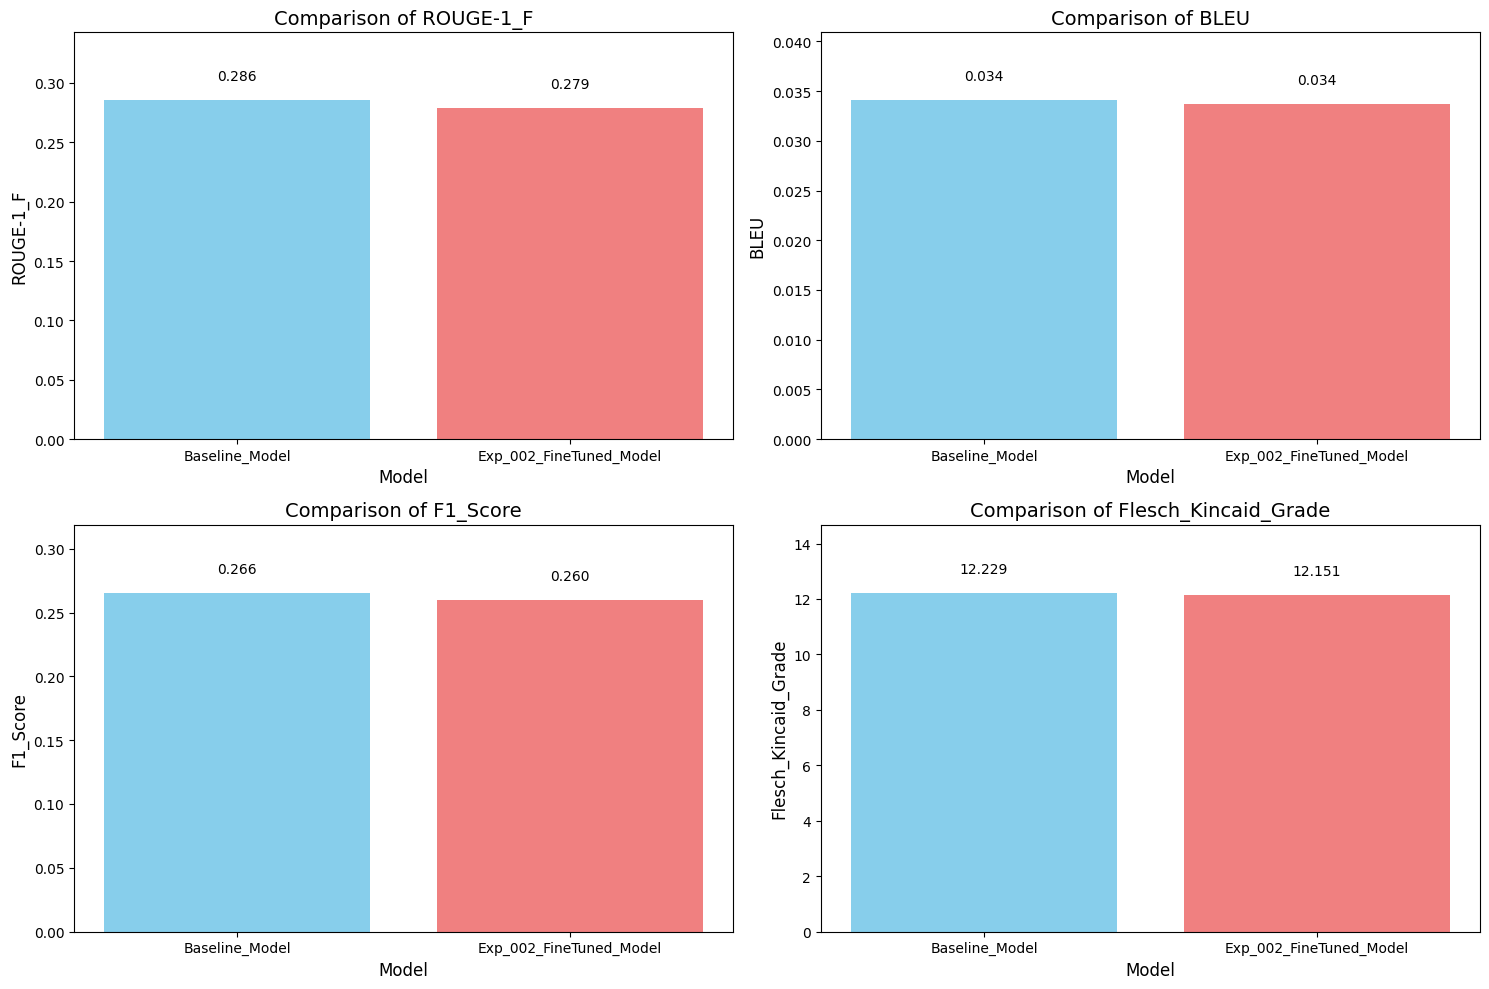

Comparative bar charts generated successfully.


In [ ]:
import matplotlib.pyplot as plt

# Define the metrics to visualize
metrics_to_plot = ['ROUGE-1_F', 'BLEU', 'F1_Score', 'Flesch_Kincaid_Grade']

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

print("Generating comparative bar charts...")

# Iterate through each metric and create a bar chart
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]

    # Extract values for Baseline and Exp_002 models
    baseline_value = comparison_df.loc['Baseline_Model', metric]
    exp002_value = comparison_df.loc['Exp_002_FineTuned_Model', metric]

    # Data for plotting
    models = ['Baseline_Model', 'Exp_002_FineTuned_Model']
    values = [baseline_value, exp002_value]
    colors = ['skyblue', 'lightcoral'] # Differentiate colors for models

    # Create the bar chart
    ax.bar(models, values, color=colors)

    # Add title and labels
    ax.set_title(f'Comparison of {metric}', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)

    # Ensure y-axis limits are appropriate
    # For scores, ensure it starts from 0. For readability, allow more flexibility.
    if 'ROUGE' in metric or 'BLEU' in metric or 'F1' in metric:
        ax.set_ylim(0, max(values) * 1.2) # Set y-limit slightly above max value for better visualization
    else: # For readability scores, which can be larger or even negative (though unlikely here)
        ax.set_ylim(min(0, min(values) * 0.8), max(values) * 1.2)

    # Add value labels on top of bars
    for j, v in enumerate(values):
        ax.text(j, v + (max(values) * 0.05), f'{v:.3f}', ha='center', va='bottom', fontsize=10)

    # Add a simple legend (though colors already indicate)
    # ax.legend(labels=models, loc='best') # Can be redundant with explicit labels on x-axis and colors

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

print("Comparative bar charts generated successfully.")

## Visualize the training process on curve


In [ ]:
import json
import os

# 1. Construct the full path to the trainer_state.json file
BASE_OUTPUT_DIR = "/content/drive/MyDrive/llm_experiments exp2"
EXPERIMENT_FOLDER = "Exp_002"
CHECKPOINT_FOLDER = "checkpoint-401" # As per instructions

checkpoint_dir = os.path.join(BASE_OUTPUT_DIR, EXPERIMENT_FOLDER, CHECKPOINT_FOLDER)
trainer_state_path = os.path.join(checkpoint_dir, "trainer_state.json")

print(f"Constructed path to trainer_state.json: {trainer_state_path}")

# 2. Open the trainer_state.json file and load its content
trainer_state_data = None
if os.path.exists(trainer_state_path):
    with open(trainer_state_path, "r") as f:
        trainer_state_data = json.load(f)
    print("trainer_state.json loaded successfully.")
else:
    print(f"Error: {trainer_state_path} not found. Please ensure the checkpoint exists.")

# 3. Extract the log_history list
log_history = []
if trainer_state_data and "log_history" in trainer_state_data:
    log_history = trainer_state_data["log_history"]
    print(f"Extracted log_history with {len(log_history)} entries.")
else:
    print("log_history not found or trainer_state_data is empty.")

# 4. Print the first few entries of the log_history
print("\nFirst 5 entries of log_history:")
for i, entry in enumerate(log_history[:5]):
    print(f"Entry {i+1}: {entry}")


Constructed path to trainer_state.json: /content/drive/MyDrive/llm_experiments exp2/Exp_002/checkpoint-401/trainer_state.json
trainer_state.json loaded successfully.
Extracted log_history with 8 entries.

First 5 entries of log_history:
Entry 1: {'epoch': 0.1103448275862069, 'grad_norm': 0.45988473296165466, 'learning_rate': 9.856983142141339e-05, 'loss': 1.504524688720703, 'step': 50}
Entry 2: {'epoch': 0.2206896551724138, 'grad_norm': 0.3753686845302582, 'learning_rate': 8.970956970545355e-05, 'loss': 1.145939712524414, 'step': 100}
Entry 3: {'epoch': 0.3310344827586207, 'grad_norm': 0.38765275478363037, 'learning_rate': 7.416009807699482e-05, 'loss': 1.1223081207275392, 'step': 150}
Entry 4: {'epoch': 0.4413793103448276, 'grad_norm': 0.4616612195968628, 'learning_rate': 5.454077707111042e-05, 'loss': 1.0828378295898438, 'step': 200}
Entry 5: {'epoch': 0.5517241379310345, 'grad_norm': 0.4262062907218933, 'learning_rate': 3.4156546971024784e-05, 'loss': 1.0883340454101562, 'step': 250

In [ ]:
import pandas as pd

# 1. Initialize two empty lists
train_loss_data = []
eval_loss_data = []

print("Parsing log_history...")

# 2. Iterate through each entry in the log_history list
for entry in log_history:
    # 3. Check for 'loss' key for training steps
    if 'loss' in entry:
        train_loss_data.append({'step': entry['step'], 'loss': entry['loss']})

    # 4. Check for 'eval_loss' key for validation steps
    if 'eval_loss' in entry:
        eval_loss_data.append({'step': entry['step'], 'eval_loss': entry['eval_loss']})

# 5. Convert the training loss list into a pandas DataFrame
train_loss_df = pd.DataFrame(train_loss_data)

# 6. Convert the validation loss list into a pandas DataFrame
eval_loss_df = pd.DataFrame(eval_loss_data)

# 7. Print the head of both DataFrames and their shapes
print("\nTrain Loss DataFrame Head:")
print(train_loss_df.head())
print(f"Train Loss DataFrame Shape: {train_loss_df.shape}")

print("\nValidation Loss DataFrame Head:")
print(eval_loss_df.head())
print(f"Validation Loss DataFrame Shape: {eval_loss_df.shape}")

Parsing log_history...

Train Loss DataFrame Head:
   step      loss
0    50  1.504525
1   100  1.145940
2   150  1.122308
3   200  1.082838
4   250  1.088334
Train Loss DataFrame Shape: (8, 2)

Validation Loss DataFrame Head:
Empty DataFrame
Columns: []
Index: []
Validation Loss DataFrame Shape: (0, 0)


Validation loss data was not available for plotting.


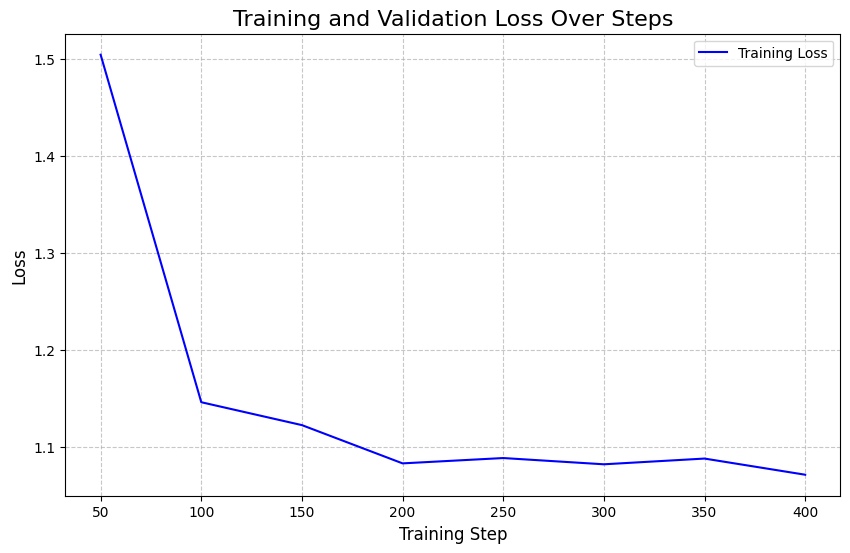

Loss visualization plot generated successfully.


In [ ]:
import matplotlib.pyplot as plt

# 1. Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# 2. Plot the training loss
plt.plot(train_loss_df['step'], train_loss_df['loss'], label='Training Loss', color='blue')

# 3. Check if validation loss data is available and plot it
if not eval_loss_df.empty:
    plt.plot(eval_loss_df['step'], eval_loss_df['eval_loss'], label='Validation Loss', color='red')
    print("Validation loss data was available and plotted.")
else:
    print("Validation loss data was not available for plotting.")

# 4. Add a title to the plot
plt.title('Training and Validation Loss Over Steps', fontsize=16)

# 5. Label the x-axis and y-axis
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Loss', fontsize=12)

# 6. Display a legend
plt.legend(fontsize=10)

# 7. Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.7)

# 8. Display the plot
plt.show()

print("Loss visualization plot generated successfully.")

## Set up Gradio for USER INTERACTION



In [ ]:
import subprocess
import sys

print("Installing gradio...")
try:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gradio"])
    print("Gradio installed successfully.")
except Exception as e:
    print(f"Error installing gradio: {e}")

Installing gradio...
Gradio installed successfully.


## Load Fine-tuned Model for Inference

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel
import os
from google.colab import drive

# Mount Google Drive to access saved adapters
drive.mount('/content/drive')

# 1. Define the base model name and the path to the saved LoRA adapters
BASE_MODEL_NAME = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# The path to the saved LoRA adapters was previously defined as:
# BASE_OUTPUT_DIR = "/content/drive/MyDrive/llm_experiments exp2"
# EXPERIMENT_FOLDER = "Exp_002"
# output_dir = os.path.join(BASE_OUTPUT_DIR, EXPERIMENT_FOLDER)
# output_adapter_dir = os.path.join(output_dir, "lora_adapters")

# For direct use, let's redefine the full path here
LOR_ADAPTERS_PATH = "/content/drive/MyDrive/llm_experiments exp2/Exp_002/lora_adapters"

# Determine device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for model loading and inference: {device}")

# 2. Initialize the tokenizer for the base model
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL_NAME)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
# Ensure padding_side is 'left' for decoder-only models for correct generation
tokenizer.padding_side = 'left'
print("Tokenizer initialized and configured for generation.")

# 3. Load the base model with quantization fallback
model_dtype = torch.bfloat16 if torch.cuda.is_available() else torch.float32
quantization_config_loading = None
base_model = None

if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load base model with 4-bit quantization.")
        quantization_config_loading = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        base_model = AutoModelForCausalLM.from_pretrained(
            BASE_MODEL_NAME,
            quantization_config=quantization_config_loading,
            dtype=torch.bfloat16,
            device_map="auto"
        )
        print("Base model loaded successfully with 4-bit quantization.")
    except Exception as e:
        print(f"Warning: 4-bit quantization failed ({e}). Falling back to loading model in full bfloat16 precision.")
        base_model = AutoModelForCausalLM.from_pretrained(
            BASE_MODEL_NAME,
            dtype=torch.bfloat16,
            device_map="auto"
        )
else:
    print("CUDA not available. Loading base model in full float32 precision.")
    base_model = AutoModelForCausalLM.from_pretrained(
        BASE_MODEL_NAME,
        dtype=torch.float32,
        device_map="auto"
    )

# 4. Load the LoRA adapters and merge with the base model
merged_model = None
try:
    # Load PEFT model using the base_model and adapters path
    peft_model_loaded = PeftModel.from_pretrained(base_model, LOR_ADAPTERS_PATH)
    # Merge the adapters into the base model
    merged_model = peft_model_loaded.merge_and_unload()
    print(f"LoRA adapters loaded and merged from {LOR_ADAPTERS_PATH}.")
except Exception as e:
    print(f"Error loading and merging PEFT model from {LOR_ADAPTERS_PATH}: {e}.")
    print("Proceeding with the base model without fine-tuned adapters.")
    merged_model = base_model # Fallback to base model if merge fails

# 5. Set the merged model to evaluation mode
merged_model.eval()
print("Model prepared for inference.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device for model loading and inference: cuda
Tokenizer initialized and configured for generation.
Attempting to load base model with 4-bit quantization.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Base model loaded successfully with 4-bit quantization.


/usr/local/lib/python3.12/dist-packages/peft/tuners/lora/bnb.py:397: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


LoRA adapters loaded and merged from /content/drive/MyDrive/llm_experiments exp2/Exp_002/lora_adapters.
Model prepared for inference.


In [ ]:
import torch

# Define the prediction function
def predict_response(question):
    # Format the user's question into the prompt structure expected by the model
    formatted_prompt = f"""### Instruction:
{question}

### Response:"""

    # Encode the prompt
    input_ids = tokenizer.encode(formatted_prompt, return_tensors="pt", truncation=True, max_length=512).to(device)

    # Generate response
    with torch.no_grad():
        output_ids = merged_model.generate(
            input_ids,
            max_new_tokens=256, # Limit generated response length
            do_sample=False,    # Use greedy decoding for consistency
            pad_token_id=tokenizer.eos_token_id, # Use eos_token_id as pad_token_id
        )

    # Decode the generated output, excluding the input prompt tokens
    generated_text = tokenizer.decode(output_ids[0][input_ids.shape[1]:], skip_special_tokens=True).strip()

    # Clean up the output if it contains the instruction/response template tags
    # This can happen if the model sometimes repeats the prompt structure
    if generated_text.startswith("### Response:"): # Remove the explicit '### Response:' tag
        generated_text = generated_text[len("### Response:"):].strip()
    if generated_text.startswith("### Instruction:"):
        # If it somehow generates the instruction tag, clean it up.
        # This might indicate that the model is generating too much of the prompt structure.
        generated_text = generated_text.split("### Response:", 1)[-1].strip()

    return generated_text

print("Prediction function 'predict_response' defined successfully.")

Prediction function 'predict_response' defined successfully.


In [ ]:
import gradio as gr

# Create the Gradio interface
# The predict_response function is already defined from the previous step

iface = gr.Interface(
    fn=predict_response,
    inputs=gr.Textbox(lines=5, label="Your Medical Question"),
    outputs=gr.Textbox(label="Generated Answer", lines=10),
    title="TinyLlama-1.1B Fine-tuned for Medical QA (Exp_002)",
    description="Ask a medical question and get an answer from the fine-tuned TinyLlama model.",
    allow_flagging="manual", # Allow users to flag responses for feedback
    flagging_dir="gradio_flags", # Directory to save flagged data
    examples=[
        ["What are the symptoms of diabetes?"],
        ["What causes high blood pressure?"],
        ["How is a common cold treated?"],
    ]
)

# Launch the Gradio interface
print("Launching Gradio interface...")
iface.launch(share=True, debug=True)
print("Gradio interface launched.")

/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Launching Gradio interface...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c4048a0a2185f1b9b4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c4048a0a2185f1b9b4.gradio.live
Gradio interface launched.


## Pushing the work on Hugging Face


In [ ]:
from huggingface_hub import notebook_login

# Authenticate with Hugging Face
notebook_login()

### Push Exp_002 LoRA Adapters to Hugging Face Hub


## Retry: Push Exp_002 LoRA Adapters to Hugging Face Hub

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel
import os
# from huggingface_hub import HfApi # HfApi is not strictly necessary for pushing if notebook_login() is used

# Define the base model name and the path to the saved LoRA adapters
BASE_MODEL_NAME = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
LOR_ADAPTERS_PATH = "/content/drive/MyDrive/llm_experiments exp2/Exp_002/lora_adapters"

# Define your Hugging Face repository ID
# IMPORTANT: Replace 'YOUR_HF_USERNAME' with your actual Hugging Face username
# And optionally adjust the repository name.
REPO_ID = "Jeanrobert/tinyllama-medqa-exp002-lora-adapters"

# Determine device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for model loading: {device}")

# 1. Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL_NAME)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'
print("Tokenizer initialized.")

# 2. Load the base model (without merging for now, as we need the PeftModel instance)
model_dtype = torch.bfloat16 if torch.cuda.is_available() else torch.float32
quantization_config_loading = None
base_model_for_peft = None

if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load base model with 4-bit quantization.")
        quantization_config_loading = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        base_model_for_peft = AutoModelForCausalLM.from_pretrained(
            BASE_MODEL_NAME,
            quantization_config=quantization_config_loading,
            torch_dtype=torch.bfloat16, # Use torch_dtype here
            device_map="auto"
        )
        print("Base model loaded successfully with 4-bit quantization.")
    except Exception as e:
        print(f"Warning: 4-bit quantization failed ({e}). Falling back to loading model in full bfloat16 precision.")
        base_model_for_peft = AutoModelForCausalLM.from_pretrained(
            BASE_MODEL_NAME,
            torch_dtype=torch.bfloat16, # Use torch_dtype here
            device_map="auto"
        )
else:
    print("CUDA not available. Loading base model in full float32 precision.")
    base_model_for_peft = AutoModelForCausalLM.from_pretrained(
        BASE_MODEL_NAME,
        torch_dtype=torch.float32, # Use torch_dtype here
        device_map="auto"
    )

# 3. Load the LoRA adapters into a PeftModel instance
peft_model_to_push = PeftModel.from_pretrained(base_model_for_peft, LOR_ADAPTERS_PATH)
print(f"LoRA adapters loaded from {LOR_ADAPTERS_PATH} into a PeftModel instance.")

# 4. Push the PeftModel (LoRA adapters) to the Hugging Face Hub
# Ensure you have logged in to Hugging Face via `notebook_login()` in a previous cell.
print(f"Pushing LoRA adapters to Hugging Face Hub under repo_id: {REPO_ID}...")

# Remove use_auth_token=True as it caused an error previously and is typically not needed after notebook_login()
try:
    peft_model_to_push.push_to_hub(REPO_ID)
    tokenizer.push_to_hub(REPO_ID) # Also push the tokenizer
    print(f"Successfully pushed LoRA adapters and tokenizer to https://huggingface.co/{REPO_ID}")
except Exception as e:
    print(f"Error pushing to Hugging Face Hub: {e}")
    print("Please ensure your Hugging Face username is correct in REPO_ID and you have write access to the repository.")

Using device for model loading: cuda
Tokenizer initialized.
Attempting to load base model with 4-bit quantization.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Base model loaded successfully with 4-bit quantization.
LoRA adapters loaded from /content/drive/MyDrive/llm_experiments exp2/Exp_002/lora_adapters into a PeftModel instance.
Pushing LoRA adapters to Hugging Face Hub under repo_id: Jeanrobert/tinyllama-medqa-exp002-lora-adapters...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...adapter_model.safetensors:   2%|2         |  560kB / 25.3MB            

README.md: 0.00B [00:00, ?B/s]

Successfully pushed LoRA adapters and tokenizer to https://huggingface.co/Jeanrobert/tinyllama-medqa-exp002-lora-adapters


### Merge Exp_002 LoRA Adapters and Push Full Model



In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel
import os

# 1. Define the base model name and the path to the saved LoRA adapters
BASE_MODEL_NAME = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
LOR_ADAPTERS_PATH = "/content/drive/MyDrive/llm_experiments exp2/Exp_002/lora_adapters"

# 2. Define a new repository ID for the merged model on Hugging Face
# IMPORTANT: Replace 'YOUR_HF_USERNAME' with your actual Hugging Face username
MERGED_REPO_ID = "Jeanrobert/tinyllama-medqa-exp002-merged-model"

# Determine device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for model loading: {device}")

# Initialize the tokenizer (re-used from previous steps)
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL_NAME)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'
print("Tokenizer initialized.")

# 3. Load the base model with quantization fallback
model_dtype = torch.bfloat16 if torch.cuda.is_available() else torch.float32
quantization_config_loading = None
base_model = None

if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load base model with 4-bit quantization.")
        quantization_config_loading = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        base_model = AutoModelForCausalLM.from_pretrained(
            BASE_MODEL_NAME,
            quantization_config=quantization_config_loading,
            torch_dtype=torch.bfloat16,
            device_map="auto"
        )
        print("Base model loaded successfully with 4-bit quantization.")
    except Exception as e:
        print(f"Warning: 4-bit quantization failed ({e}). Falling back to loading model in full bfloat16 precision.")
        base_model = AutoModelForCausalLM.from_pretrained(
            BASE_MODEL_NAME,
            torch_dtype=torch.bfloat16,
            device_map="auto"
        )
else:
    print("CUDA not available. Loading base model in full float32 precision.")
    base_model = AutoModelForCausalLM.from_pretrained(
        BASE_MODEL_NAME,
        torch_dtype=torch.float32,
        device_map="auto"
    )

# 4. Load the LoRA adapters into a PeftModel instance
peft_model = PeftModel.from_pretrained(base_model, LOR_ADAPTERS_PATH)
print(f"LoRA adapters loaded from {LOR_ADAPTERS_PATH} into a PeftModel instance.")

# 5. Merge the LoRA adapters with the base model to create a full, standalone fine-tuned model
merged_model = peft_model.merge_and_unload()
print("LoRA adapters successfully merged into the base model.")

# 6. Push the merged_model to the Hugging Face Hub
print(f"Pushing merged model to Hugging Face Hub under repo_id: {MERGED_REPO_ID}...")

try:
    merged_model.push_to_hub(MERGED_REPO_ID)
    print(f"Successfully pushed merged model to https://huggingface.co/{MERGED_REPO_ID}")
except Exception as e:
    print(f"Error pushing merged model to Hugging Face Hub: {e}")
    print("Please ensure you have write access to the repository and are authenticated.")

# 7. Push the tokenizer to the same Hugging Face repository
print(f"Pushing tokenizer to Hugging Face Hub under repo_id: {MERGED_REPO_ID}...")
try:
    tokenizer.push_to_hub(MERGED_REPO_ID)
    print(f"Successfully pushed tokenizer to https://huggingface.co/{MERGED_REPO_ID}")
except Exception as e:
    print(f"Error pushing tokenizer to Hugging Face Hub: {e}")
    print("Please ensure you have write access to the repository and are authenticated.")


Using device for model loading: cuda
Tokenizer initialized.
Attempting to load base model with 4-bit quantization.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Base model loaded successfully with 4-bit quantization.
LoRA adapters loaded from /content/drive/MyDrive/llm_experiments exp2/Exp_002/lora_adapters into a PeftModel instance.


/usr/local/lib/python3.12/dist-packages/peft/tuners/lora/bnb.py:397: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


LoRA adapters successfully merged into the base model.
Pushing merged model to Hugging Face Hub under repo_id: Jeanrobert/tinyllama-medqa-exp002-merged-model...


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...y_56go_/model.safetensors:   0%|          | 12.4kB /  807MB            

Successfully pushed merged model to https://huggingface.co/Jeanrobert/tinyllama-medqa-exp002-merged-model
Pushing tokenizer to Hugging Face Hub under repo_id: Jeanrobert/tinyllama-medqa-exp002-merged-model...


README.md: 0.00B [00:00, ?B/s]

Successfully pushed tokenizer to https://huggingface.co/Jeanrobert/tinyllama-medqa-exp002-merged-model
